In [45]:
# for preprocessing the data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

# the model
from sklearn.linear_model import LogisticRegression

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from livelossplot.keras import PlotLossesCallback
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import keras





# for training our model
x_train = pd.read_csv('train_values.csv', index_col='patient_id')
y_train = pd.read_csv('train_labels.csv', index_col='patient_id')

In [46]:
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'resting_blood_pressure',
                    'chest_pain_type',
                    'resting_ekg_results',
                    'fasting_blood_sugar_gt_120_mg_per_dl',
                    'resting_ekg_results',
                    'serum_cholesterol_mg_per_dl',
                    'exercise_induced_angina',
                    'slope_of_peak_exercise_st_segment',
                     'num_major_vessels',
                    ]
x_train_subset = x_train[selected_features]

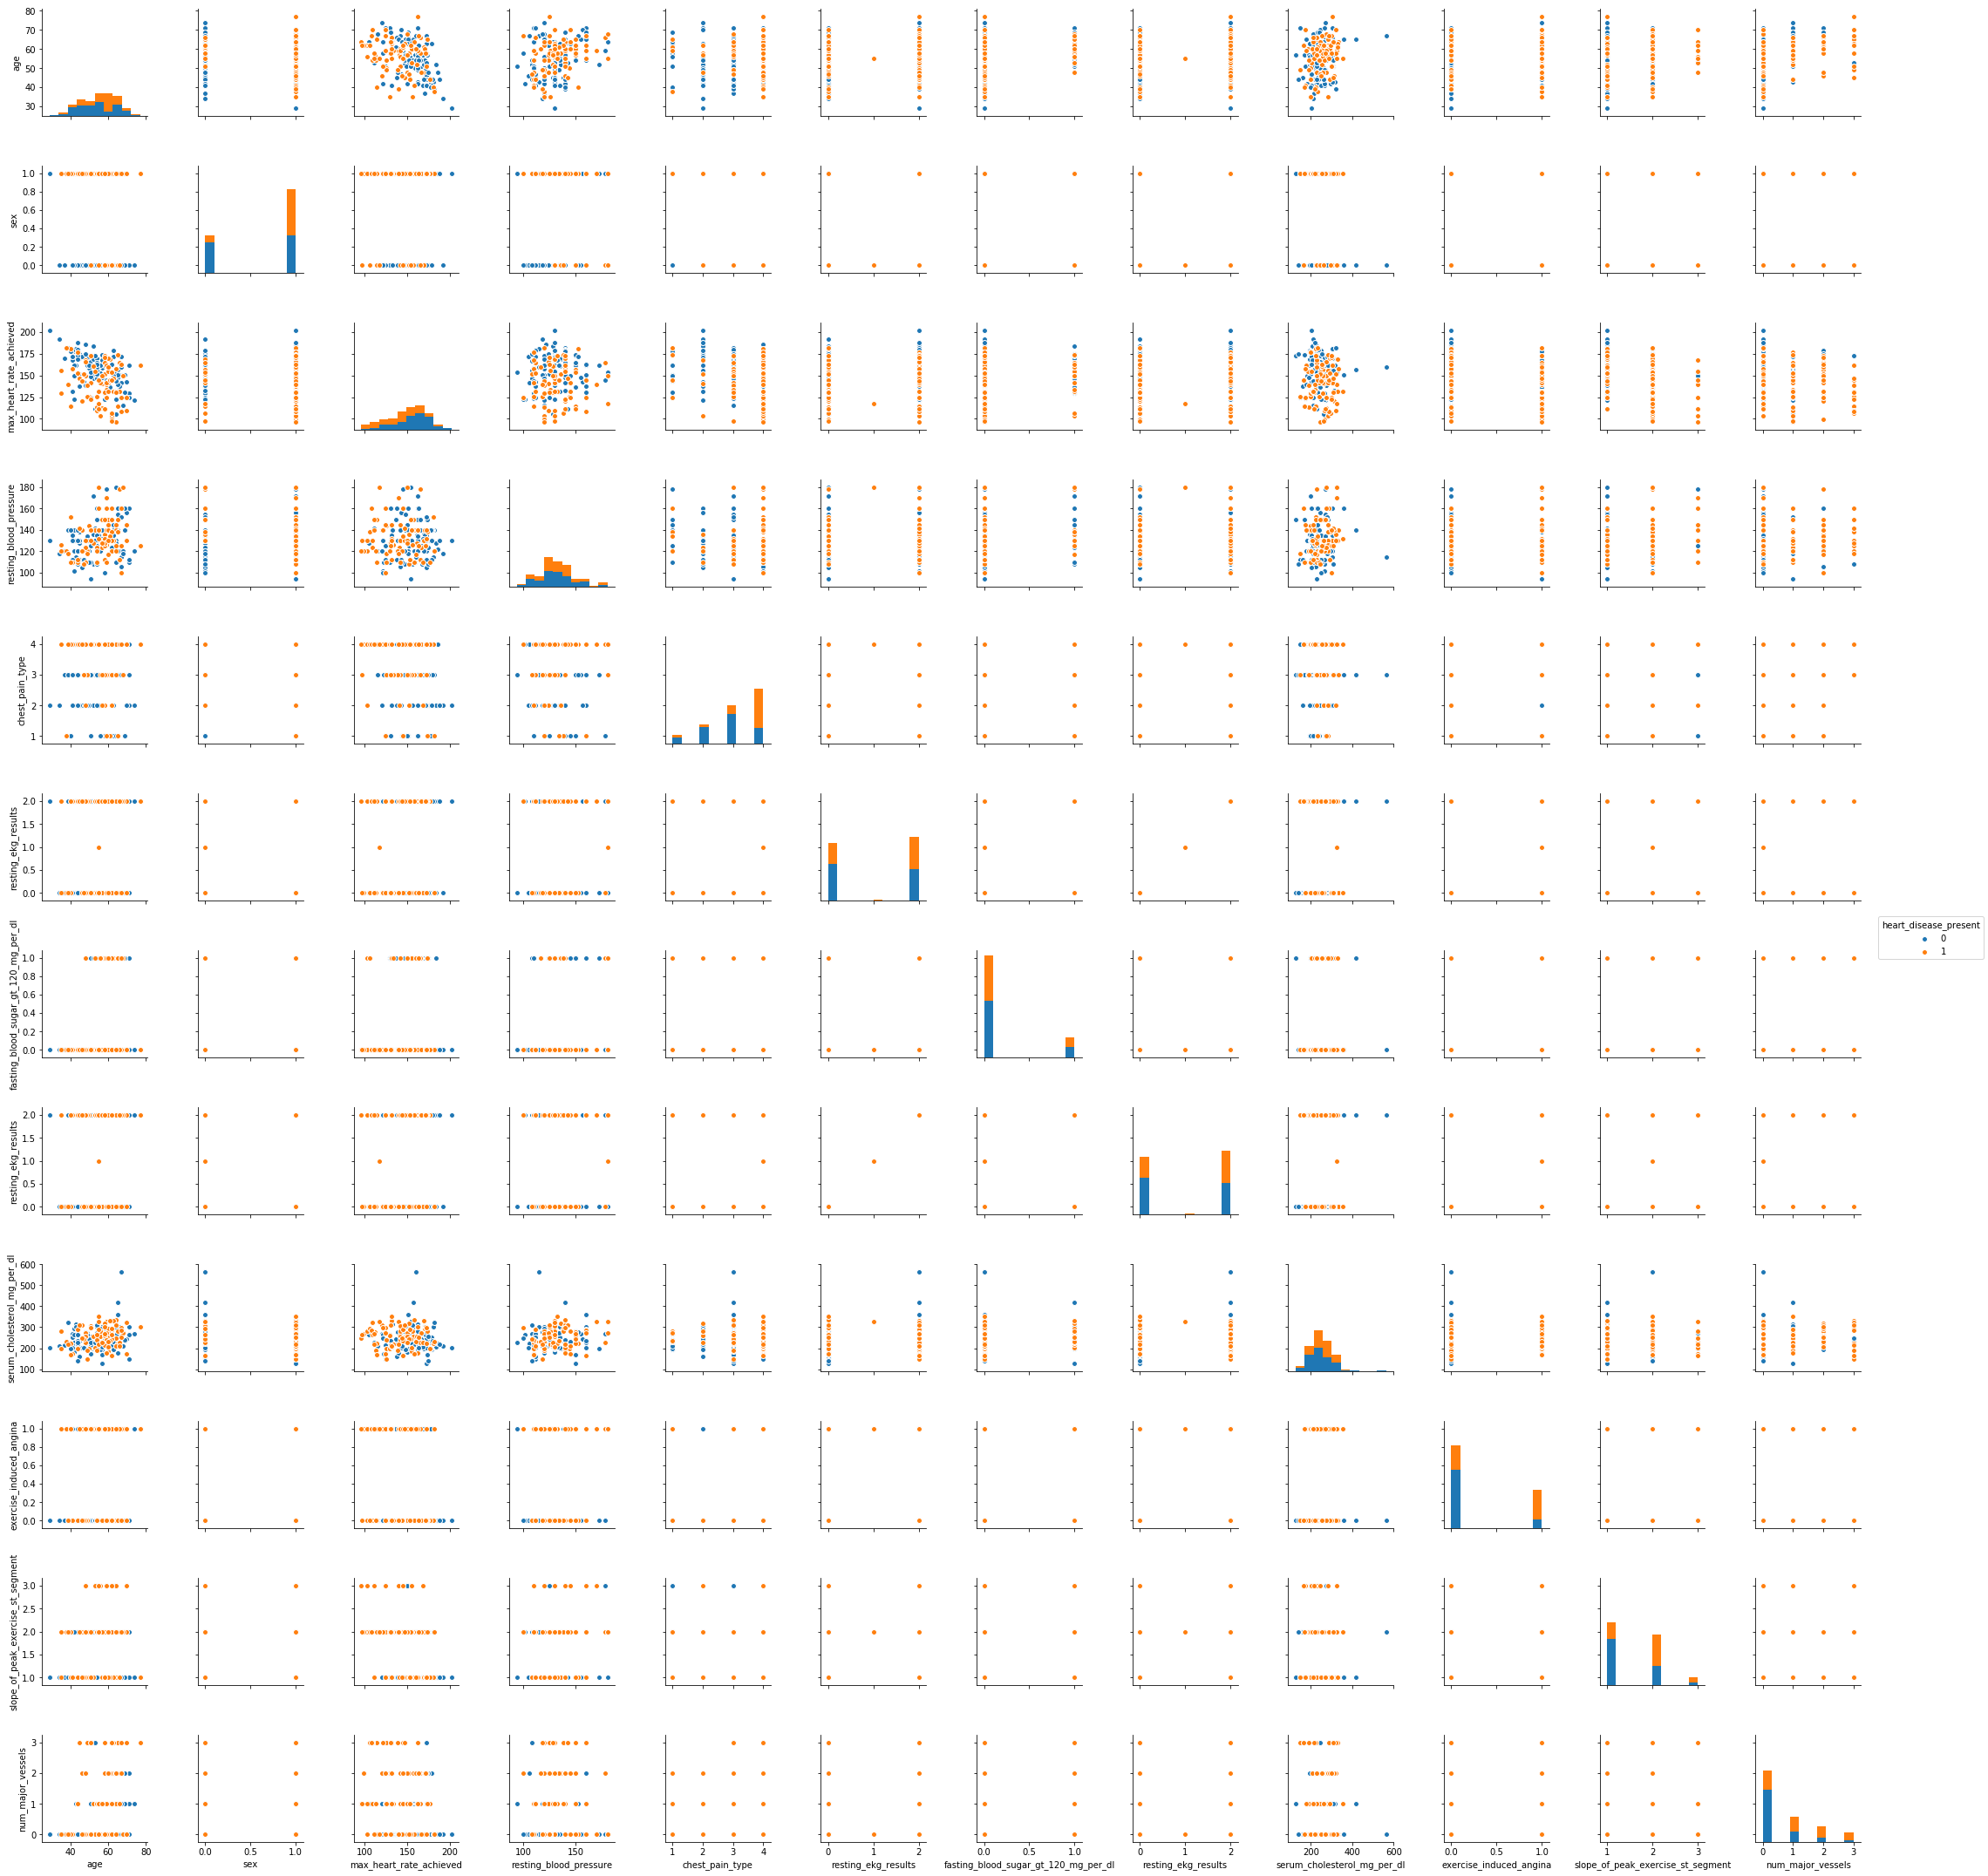

In [60]:
sns.pairplot(x_train.join(y_train), 
             hue='heart_disease_present', 
             vars=selected_features)

In [48]:
logreg = LogisticRegression()


parameters = {'C': [0.0001, 0.001, 0.01, 1, 10], 
              'penalty': ['l1', 'l2']}

logreg_gs = GridSearchCV(logreg,parameters, cv=10, return_train_score = True,)

logreg_gs.fit(x_train_subset,y_train.values.reshape((y_train.size,)))

print("Best CV params", logreg_gs.best_params_)

best_lr = logreg_gs.best_estimator_

coefs = best_lr.coef_

print("Total number of features:",coefs.size)

print('Number of selected features: {}'.format(np.count_nonzero(coefs)))


/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

Best CV params {'C': 10, 'penalty': 'l1'}
Total number of features: 12
Number of selected features: 12


/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ivan/environments/DL/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/lo

In [49]:
print("Best CV params", logreg_gs.best_params_)
print("Total number of features:",coefs.size)

print('Number of selected features: {}'.format(np.count_nonzero(coefs)))


Best CV params {'C': 10, 'penalty': 'l1'}
Total number of features: 12
Number of selected features: 12


In [50]:
in_sample_preds =logreg_gs.predict_proba(train_values[selected_features])
log_loss(train_labels.heart_disease_present, in_sample_preds)

0.378112454461275

In [51]:
test_values = pd.read_csv('test_values.csv', index_col='patient_id')

In [52]:
test_values_subset = test_values[selected_features]

In [53]:
predictions = logreg_gs.predict_proba(test_values_subset)[:, 1]

In [54]:
submission_format = pd.read_csv('submission_format.csv', index_col='patient_id')

In [55]:
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [56]:
my_submission.head()

,heart_disease_present
patient_id,
olalu7,0.274285
z9n6mx,0.036955
5k4413,0.881910
mrg7q5,0.064414
uki4do,0.946045


In [57]:
my_submission.to_csv('submission.csv')

In [58]:
!head submission.csv

patient_id,heart_disease_present
olalu7,0.27428494118627
z9n6mx,0.036954984980875696
5k4413,0.8819100561982228
mrg7q5,0.0644142538165388
uki4do,0.9460445756142924
kev1sk,0.05741061192234008
9n6let,0.09140894800686725
jxmtyg,0.9633585479084829
51s2ff,0.26306232307504995
